In [1]:
#Benjamin Schreyer benontheplanet@gmail.com

#TODO:
#RungeKutta aribtrary precision in compiled language
#Mixed sin an cosine bending predictions
#Write up analytic parts for estimates
#Other zero search besides binary like Secant method could be faster.

import matplotlib.pyplot as plt
from mpmath import mpmathify
import mpmath as mp
import numpy as np
import math
import time

from functions_bending_schreyer import *

###
### Need to look at Green's function iteration methods, it seems like this could work, certainly
### for the case of constantI(s)

#https://www.johndcook.com/blog/2020/02/13/runge-kutta-methods/
#https://nodepy.readthedocs.io/en/latest/modules/runge_kutta_method.html#nodepy.runge_kutta_method.DC
#https://ntrs.nasa.gov/api/citations/19710018627/downloads/19710018627.pdf

Theta small?: False
Cosine bending!
[               0.0]
[               0.0]
[0.0237078029122995]
[             0.0]
[             0.0]
[24.2767901821947]
9.20087269538753
[             0.0]
[             0.0]
[1.10148222707717]
0.604671361913617
[              0.0]
[              0.0]
[0.607536582132062]
0.336221227168326
[              0.0]
[              0.0]
[0.764369025669441]
0.422137427667023
[              0.0]
[              0.0]
[0.763126417374579]
0.421458873880194
[              0.0]
[              0.0]
[0.763126417374579]
3.265979392 Runtime 1 bend


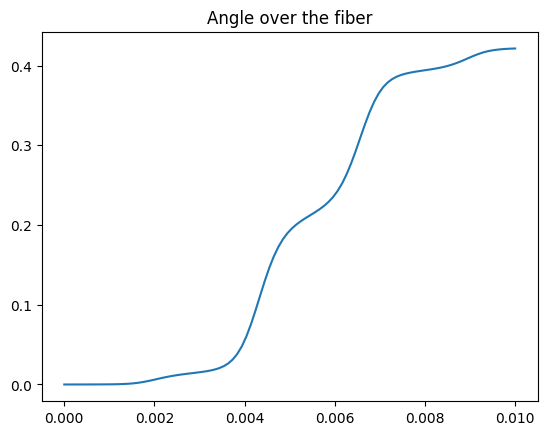

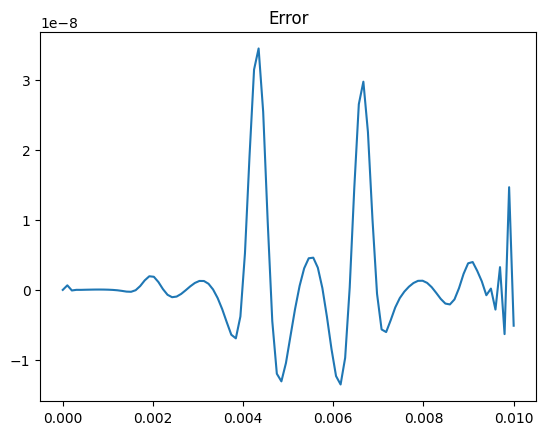

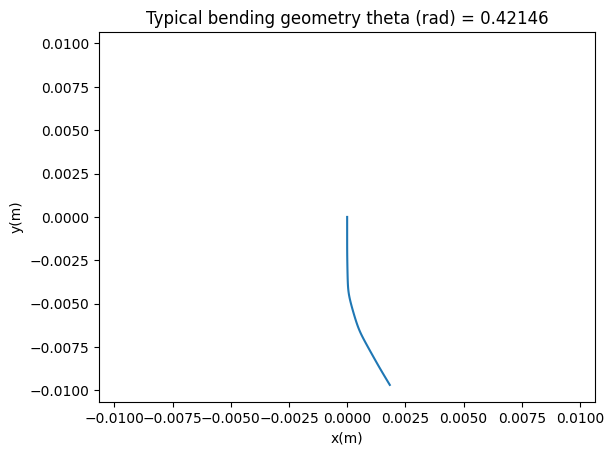

In [6]:
#Cosine only bending demo

S = mpmathify("1E-2")
E = mpmathify("78E9")
#To find a bending of angle theta:
#If F is zero, do a search on F2
#If F is nonzero and F2 is zero do a search on M0
#If both F and F2 are nonzero do a search on F2
F =  mpmathify(0.0)
F2 =  mpmathify(0.24*10**-7)

#smallest width
mini = 0.4

#Define geometry of the flexure
def If(s):
    return ((s - 0.005)**2/ ((0.005**(2))) + mini)**3 * ((1*10**-3)**3 * 10**-4/12) * np.exp(np.sin(2/0.01 * 13 * s))

def I(s):
    return mpmathify(If(float(s)))

grid = mp.matrix(np.linspace(0,0.01,100))
#print(grid)
#print(grid[len(grid) - 1],"GRID last entry")
Isamples = mp.matrix(If(np.linspace(0,0.01,100)))
#floating precision
mp.dps = 40



Ti = time.time_ns()
S, F, Es = bend_samples(grid, Isamples, order = 4, E = E, Fsin = mpmathify(0), Fcos = True, theta0 = mpmathify(0.4214567), tol = mpmathify(0.001))
Tf = time.time_ns()
print((Tf - Ti)/10**9, "Runtime 1 bend")

S = np.array(S, dtype = "float")
F = np.array(F, dtype = "float")
Es = np.array(Es, dtype = "float")
plt.plot(S,F[:,-2])
plt.title("Angle over the fiber")
plt.show()
plt.title("Error")
plt.plot(S,Es[:,-2])
plt.show()

xs,zs = integrate_xz([x[1] for x in list(F)],S)
#plot limits to give perceived geometry
lm = [-1.1*np.max([np.max(np.abs(xs)),np.max(np.abs(zs))]),1.1*np.max([np.max(np.abs(xs)),np.max(np.abs(zs))])]

plt.xlim(lm)
plt.ylim(lm)
plt.plot(xs,zs)
plt.title("Typical bending geometry theta (rad) = " + str(round(F[-1][-2],5)))
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.show()

Theta small?: False
[1.0e-4602]
[      0.0]
[      0.0]
[1.86202688445866e-188]
[                  0.0]
[                  0.0]
[1.90671552968567e-185]
[                  0.0]
[                  0.0]
3.53974949488314
[1.17537031999454e-186]
[                  0.0]
[                  0.0]
0.43418125225219
[-5.01773578665305e-188]
[                   0.0]
[                   0.0]
-0.0186490112942856
[5.99648902890205e-187]
[                  0.0]
[                  0.0]
0.222512723110639
[5.9680337869893e-187]
[                 0.0]
[                 0.0]
0.221460179454615
[5.9680337869893e-187]
[                 0.0]
[                 0.0]
3.963740944 Runtime 1 bend


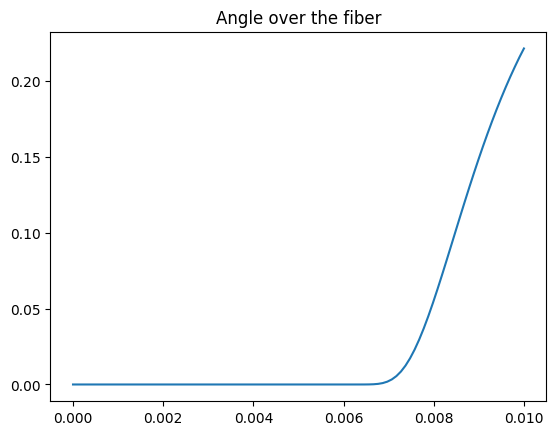

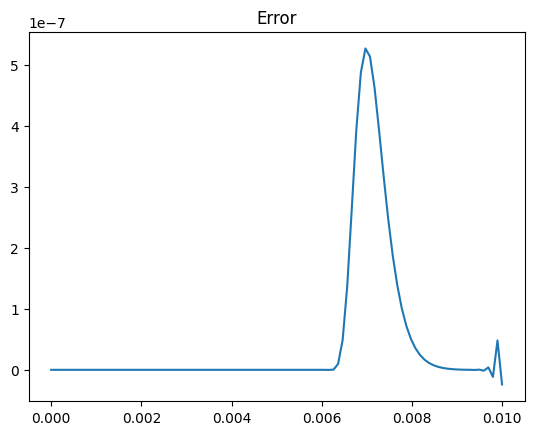

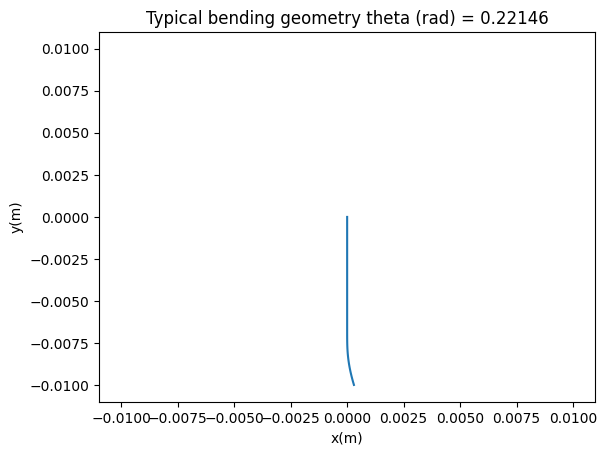

In [7]:
#Sine only bending demo

S = mpmathify("1E-2")
E = mpmathify("78E9")
#To find a bending of angle theta:
#If F is zero, do a search on F2
#If F is nonzero and F2 is zero do a search on M0
#If both F and F2 are nonzero do a search on F2
F =  mpmathify(0.0)
F2 =  mpmathify(0.24*10**-7)

#smallest width
mini = 0.0004

#Define geometry of the flexure
def If(s):
    return ((s - 0.005)**2/ ((0.005**(2))) + mini)**3 * ((1*10**-3)**3 * 10**-4/12) #* np.exp(np.sin(2/0.01 * 13 * s))

def I(s):
    return mpmathify(If(float(s)))

grid = mp.matrix(np.linspace(0,0.01,100))
#print(grid)
#print(grid[len(grid) - 1],"GRID last entry")
Isamples = mp.matrix(If(np.linspace(0,0.01,100)))
#floating precision
mp.dps = 40



Ti = time.time_ns()
S, F, Es = bend_samples(grid, Isamples, order = 4, E = E, Fsin = mpmathify(120), Fcos = False, theta0 = mpmathify(0.2214567), tol = mpmathify(0.001))
Tf = time.time_ns()
print((Tf - Ti)/10**9, "Runtime 1 bend")

S = np.array(S, dtype = "float")
F = np.array(F, dtype = "float")
Es = np.array(Es, dtype = "float")
plt.plot(S,F[:,-2])
plt.title("Angle over the fiber")
plt.show()
plt.title("Error")
plt.plot(S,Es[:,-2])
plt.show()

xs,zs = integrate_xz([x[1] for x in list(F)],S)
#plot limits to give perceived geometry
lm = [-1.1*np.max([np.max(np.abs(xs)),np.max(np.abs(zs))]),1.1*np.max([np.max(np.abs(xs)),np.max(np.abs(zs))])]

plt.xlim(lm)
plt.ylim(lm)
plt.plot(xs,zs)
plt.title("Typical bending geometry theta (rad) = " + str(round(F[-1][-2],5)))
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.show()